In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.get_cluster import cluster_os_new2


from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.get_cluster import C_rsmso,cluster_os
from TO_sim.To_Draw import Draw_avg_vel_r

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal


In [37]:
df = pd.read_excel('N = 500 seed = 10 test dt = 0.01 230708 ver3.xlsm',index_col=[0,1])
ms = df.reset_index().m.unique()

In [38]:
df_Km = df.copy()

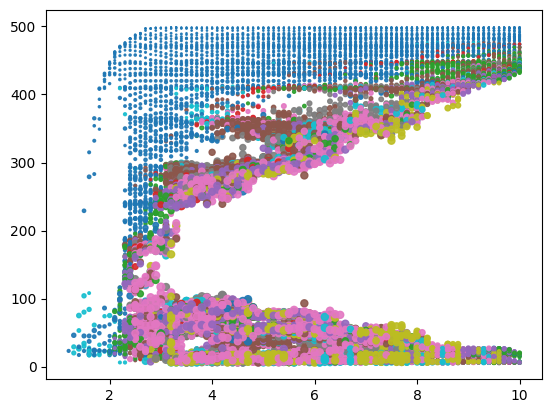

In [46]:
check_list_m = []
check_list_K = []

for i in range(100):
    ms = df_Km.reset_index().m.unique()
    re_df = df_Km.reset_index()

    df_m = re_df[re_df.m == ms[i]]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    cluster_s = df_m.iloc[:,5:15]
    cluster_o = df_m.iloc[:,15:25]
    len_cluster = (~cluster_o.isna()).sum(axis=1).to_numpy()
    plt.scatter(np.ones((10,101))*Ks,cluster_s.to_numpy().T,alpha=0.9,
                c=np.ones((10,101))*(len_cluster),s=50*np.ones((10,101))*rMM,cmap='tab10')
    # plt.colorbar()
    len_cluster = (~cluster_o.isna()).sum(axis=1)
    is_na = df_m.K.loc[df_m.K>2][len_cluster ==0].to_numpy()
    if len(is_na) !=0:
        # print(ms[i],is_na)
        for K in is_na:
            check_list_K.append(K)
            check_list_m.append(ms[i])



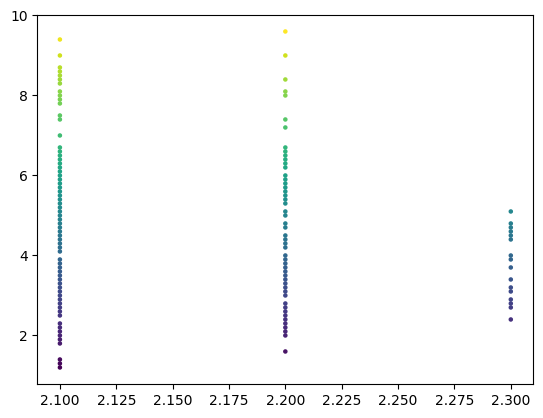

In [47]:
plt.scatter(check_list_K,check_list_m,s=5,c=check_list_m)

In [41]:
re_check_list_m = [] 
re_check_list_K = []
for m,K in list(zip(check_list_m,check_list_K)):
    if K > 2.3:
        re_check_list_m.append(m)
        re_check_list_K.append(K)

In [44]:
re_check_list_m

[0.0,
 0.1,
 0.2,
 0.5,
 0.6000000000000001,
 0.9,
 1.0,
 1.1,
 1.1,
 1.2,
 1.2,
 1.2,
 1.3,
 1.3,
 1.3,
 1.3,
 1.3,
 1.6,
 1.6,
 1.8,
 2.0,
 2.0,
 2.4,
 2.9,
 3.3,
 9.700000000000001]

In [45]:
for m,K in list(zip(re_check_list_m,re_check_list_K)):
        seed =10
        N = 500
        theta_init,omega,Kc = Normal(N,0,1,seed=seed)
        omega = np.sort(omega) 
        t_end = 2000
        dt =0.01
        t = np.arange(0,t_end,dt)
        theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_init,p_dtheta= 0*omega,p_omega=omega,result_time = int((t_end)-(350))*int(1/dt))
        if m == 0:
                dtheta = np.c_[dtheta[0],dtheta.T].T
        r_c = np.cumsum(rs,axis=0)
        sum_time = 150*int(1/dt)
        t_sum = t[sum_time:]
        avg_r_set = (r_c[sum_time:]-r_c[:-sum_time])/sum_time

        r_duration = rs[-5000:]
        r = np.mean(r_duration,axis=0)
        rstd = np.std(r_duration,axis=0)
        rMM = (np.max(r_duration,axis=0)-np.min(r_duration,axis=0))

        sum_time = 1500
        dtheta_c = np.cumsum(dtheta,axis=0)
        avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

        c_threshold = np.where(r<0.1,1e-5,3e-4)
        CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(AVG=avg_dtheta,check=c_threshold,c_size=5,N=N,omega=omega)
        dtype = [('cluster size', int), ('cluster mean phase velocity', float)]
        dtype2 = [('cluster size', int), ('cluster mean natural frequency', float)]
        CSMP = np.array([(S,P) for S,P in zip(CS,CMP)],dtype=dtype)
        CSMO = np.array([(S,O) for S,O in zip(CS,CMO)],dtype=dtype2)
        

        df_Km.loc[(K,m),"r"] = r
        df_Km.loc[(K,m),"rstd"] = rstd
        df_Km.loc[(K,m),"rMM"] = rMM
        df_Km.loc[(K,m),'error'] = np.nan
        for i in range(len(CSMO)):
                df_Km.loc[(K,m),f'c{i}'] = CSMP['cluster size'][i]
                df_Km.loc[(K,m),f'c{i} phase vel'] = CSMP['cluster mean phase velocity'][i]
                df_Km.loc[(K,m),f'c{i} omega'] = CSMO['cluster mean natural frequency'][i]
        

/Users/kimgug-young/Desktop/KURAMOTO 1st order/Kuramoto-model/TO_sim/get_cluster.py:273: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cluster = np.array([np.arange(c_i,c_j,1) for c_i,c_j in zip(C_start[Is_group,-1],C_end[Is_group,-1])])


In [48]:
df_Km.sort_index().to_excel(f'N = 500 seed = 10 test dt = 0.01 230708 ver3.xlsm')

In [16]:
K,m

(3.0, 0.6000000000000001)

In [14]:
K,m,CSMP

(2.6,
 1.1,
 array([(490, 0.02295533)],
       dtype=[('cluster size', '<i8'), ('cluster mean phase velocity', '<f8')]))

In [ ]:

for m,(r,rstd,rMM,CSMP_set,CSMO_set,error_set,C_s_set,C_e_set) in zip(ms,parmap.map(C_rsmso_set_new,ms,K_set=K_set,N=N,theta_init_set=theta_init_set,
                                                    omega_set=omega_set,pdtheta_set = pdtheta_set,t_end=2000,dt=0.01,
                                                    pm_pbar=True, pm_processes=core)):
    for i,K in enumerate(K_set.reshape(-1)):
        df_Km.loc[(K,m),"r"] = r[i]
        df_Km.loc[(K,m),"rstd"] = rstd[i]
        df_Km.loc[(K,m),"rMM"] = rMM[i]
        df_Km.loc[(K,m),'error'] = error_set[i]
        CSMP = CSMP_set[i]
        CSMO = CSMO_set[i]
        for i in range(len(CSMP_set[i])):
                df_Km.loc[(K,m),f'c{i}'] = CSMP['cluster size'][i]
                df_Km.loc[(K,m),f'c{i} phase vel'] = CSMP['cluster mean phase velocity'][i]
                df_Km.loc[(K,m),f'c{i} omega'] = CSMO['cluster mean natural frequency'][i]

